In [9]:
import numpy as np
from sklearn import datasets
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
%matplotlib inline

In [10]:
iris = datasets.load_iris()
def printRows():
    count = 0;
    for n in iris.data:
        count += 1
        if (count < 10):
            print(n)
        
printRows()        

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]


In [11]:
names_df = pd.read_csv('../albon/old_norwegiann_names.csv')
# names_df.head()
# len(names_df)
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [12]:
elves = []
count = 0
elf_columns = ['Name', 'Gender', 'Species', 'Height', 'Weight', 'Strength', 'Stamina']

def get_weight(len):
    return len * 120

for index, row in iris_df.iterrows():
    if count < len(names_df):
        name = names_df.at[count, 'Name'] 
        gender = names_df.at[count, 'Gender']         
        elf = (name, gender, row['species'], row['petal length (cm)'], get_weight(row['petal length (cm)']), row['sepal length (cm)'], row['sepal width (cm)'])
        elves.append(elf)
        count += 1           
    
elves_df = pd.DataFrame(elves, columns = elf_columns)     

    
import csv

def write_csv():
    f = open('elves.csv', 'w')
    writer = csv.writer(f)
    writer.writerow(elf_columns)
    for row in elves:
        name = row[0]
        gender = row[1]
        species =  row[2]
        height = row[3]
        weight = row[4]
        strength = row[5]
        stamina = row[6]
        writer.writerow([name, gender, species, height, weight, strength, stamina])
    f.close() 
    
write_csv()    

# look up the meaning by the name
name = elves_df.at[20,"Name"]

elves_meaning_df = pd.merge(elves_df, names_df, how='left',
        left_on='Name', right_on='Name')

# meaning = elves_meaning_df.at[0,"Meaning"]
# print (name, " : ", meaning)

def get_meaning(name):
    return (names_df.loc[names_df['Name'] == name]).values[0][1]

meaning = get_meaning(name)
meaning



'Eagle of the woods; a clear minded and has a good judgement'

In [84]:
elves_df.head(20)

,Name,Gender,Species,Height,Weight,Strength,Stamina
0,Emil,Boy,setosa,1.4,168.0,5.1,3.5
1,Emilie,Girl,setosa,1.4,168.0,4.9,3.0
2,Emma,Girl,setosa,1.3,156.0,4.7,3.2
3,Ingrid,Girl,setosa,1.5,180.0,4.6,3.1
4,Ísak,Boy,setosa,1.4,168.0,5.0,3.6
5,Jacob,Boy,setosa,1.7,204.0,5.4,3.9
6,Lucas,Boy,setosa,1.4,168.0,4.6,3.4
7,Maya,Girl,setosa,1.5,180.0,5.0,3.4
8,Noah,Unisex,setosa,1.4,168.0,4.4,2.9
9,Norah,Girl,setosa,1.5,180.0,4.9,3.1


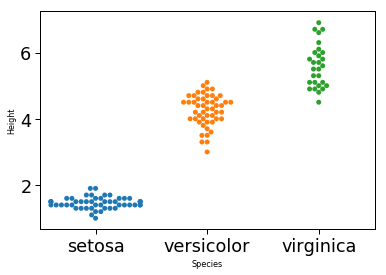

In [13]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set context to `"paper"`
sns.set_context("paper", font_scale=2, rc={"font.size":8,"axes.labelsize":8})

# Load iris data
iris = sns.load_dataset("iris")

# Construct iris plot
sns.swarmplot(x="Species", y="Height", data=elves_df)

# Show plot
plt.show()

In [20]:
elves_df.head()

,Name,Gender,Species,Height,Weight,Strength,Stamina
0,Emil,Boy,setosa,5.1,160.0,5.1,3.5
1,Emilie,Girl,setosa,4.9,160.0,4.9,3.0
2,Emma,Girl,setosa,4.7,160.0,4.7,3.2
3,Ingrid,Girl,setosa,4.6,160.0,4.6,3.1
4,Ísak,Boy,setosa,5.0,160.0,5.0,3.6


In [21]:
elves_df.describe()

,Height,Weight,Strength,Stamina
count,128.000000,128.000000,128.000000,128.000000
mean,5.710938,844.375000,5.710938,3.063281
std,0.795780,579.051288,0.795780,0.456773
min,4.300000,80.000000,4.300000,2.000000
25%,5.075000,160.000000,5.075000,2.800000
50%,5.600000,960.000000,5.600000,3.000000
75%,6.300000,1220.000000,6.300000,3.400000
max,7.700000,2000.000000,7.700000,4.400000


In [22]:
elves_df.shape

(128, 7)

In [25]:
elves_df.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     28
dtype: int64

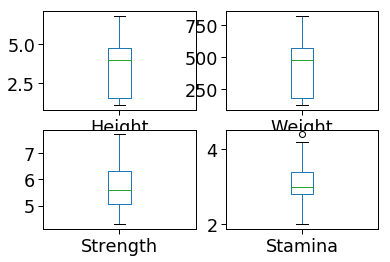

In [86]:
# box and whisker plots
elves_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

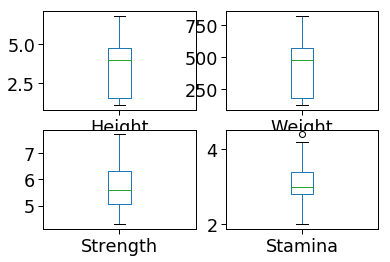

In [87]:
# box and whisker plots
elves_df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

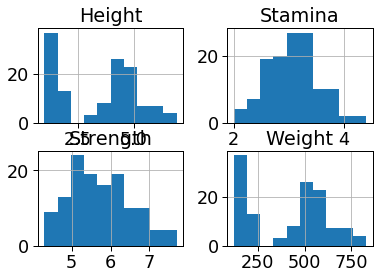

In [88]:
# histograms
elves_df.hist()
plt.show()

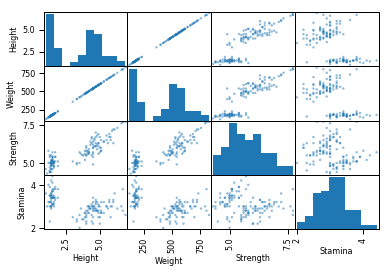

In [89]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(elves_df)
plt.show()
# array([[' Emil', 'Boy', 'setosa', 5.1, 160.0, 5.1, 3.5],

In [19]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder
import random
import numpy as np

# we don't want all the targets to be 0 so for now just randonmly select 2 or 1 
# if all 0, then the prediction is simply 0

iris_dataset = datasets.load_iris()
iris_limited = []
count = 0
targets = iris_dataset.target.tolist()
for target in targets:
    if count < 128:
        iris_limited.append(target)
    count += 1

print(len(iris_limited))       

128


In [14]:
# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df 
    
# Split-out validation dataset
array = elves_df.values
Y = iris_limited

# elves_df.drop('Name', axis=1, inplace=True)

encoded_elves_df = dummyEncode(elves_df)

X = encoded_elves_df

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size)

# Test options and evaluation metric
scoring = 'accuracy'

# encoded_elves_df.head(5)

# print (Y_train)

In [16]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.980000 (0.040000)
LDA: 1.000000 (0.000000)
KNN: 0.990000 (0.030000)
CART: 0.990000 (0.030000)
NB: 1.000000 (0.000000)
SVM: 0.551818 (0.127988)


/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/brandonflowers/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", Futur

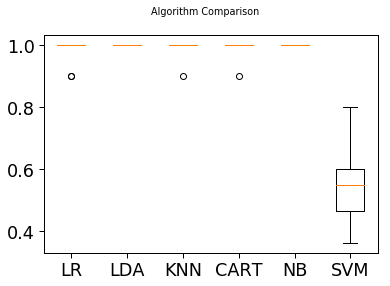

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [18]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9615384615384616
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

   micro avg       0.96      0.96      0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26

